# Recycling Waste Dataset Analysis

### Dataset Source
This dataset is a subset of the [Garbage Dataset](https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2?resource=download)

### Target Classes
We are working with 5 recyclable waste categories: 
- Plastic
- Metal
- Cardboard
- Glass
- Trash

This dataset is split into a 80-10-10 split of Train, Validation, and Test


## Imports and Setup

In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from PIL import Image
import random
from collections import Counter

In [10]:
DATA_DIR = "../dataset/split/train"
classes = sorted(os.listdir(DATA_DIR))
print("Classes:\n", classes)

Classes:
 ['cardboard', 'glass', 'metal', 'plastic', 'trash']


## Class Distribution

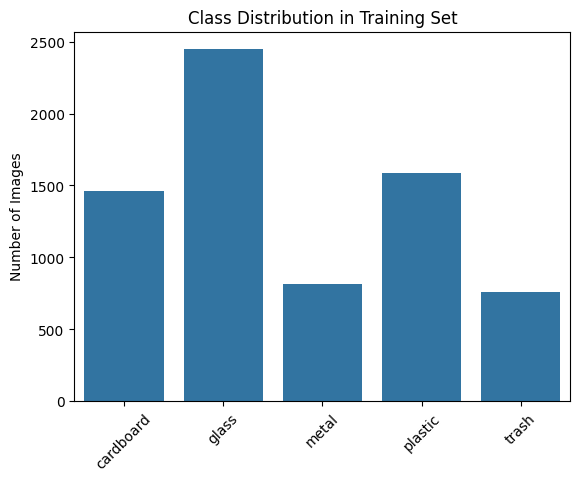

In [ ]:
class_counts = {}
for c in classes:
    class_dir = os.path.join(DATA_DIR, c)
    class_counts[c] = len(os.listdir(class_dir))

sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


The dataset is fairly well populated across the all classes. Each class contains at least ~750 images, making the dataset suitable for transfer learning with a lightweight CNN model.

However, the glass class appears to be overrepresented compared to others, with more than 2x as many samples as some underrepresented classes (metal & trash). Worth noting as this class imbalance may affect the model’s ability to generalize well across all categories.



## Random Samples

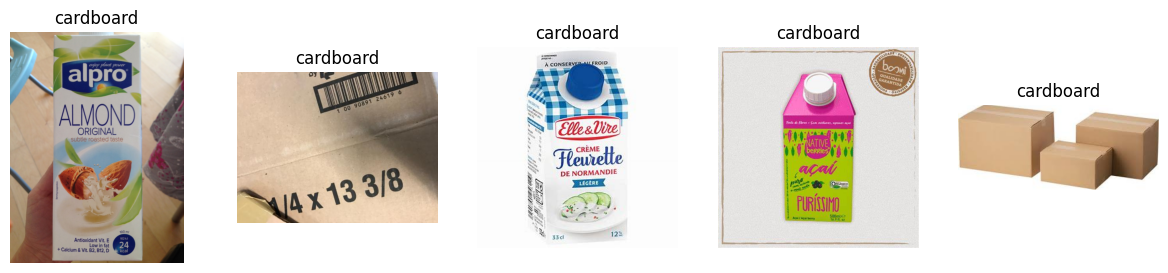

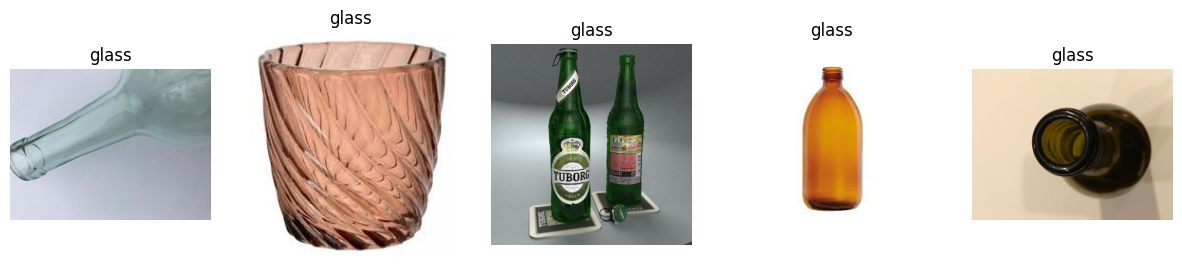

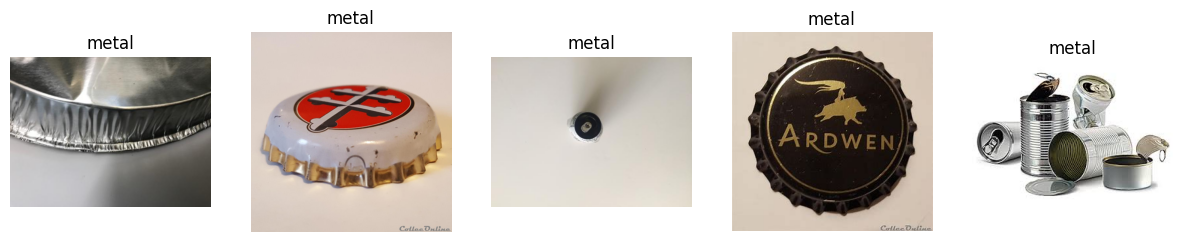

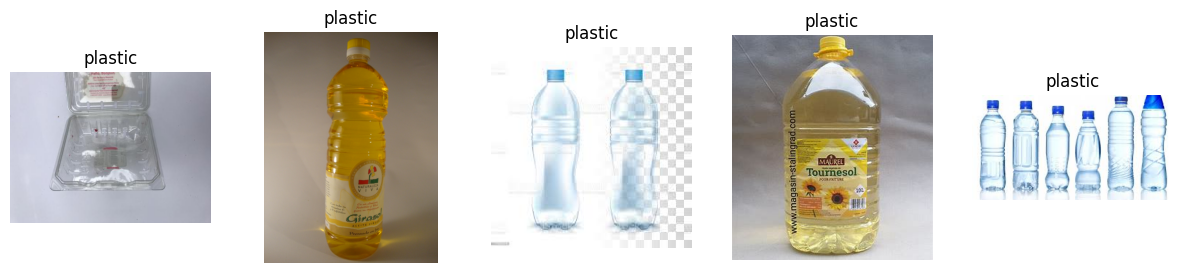

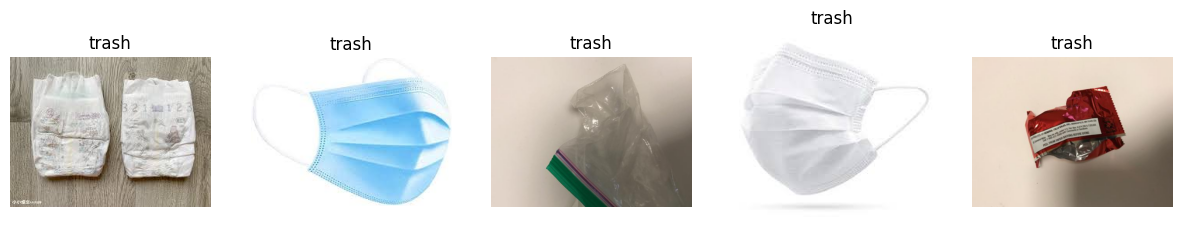

In [20]:
def show_samples(class_name, num=len(classes)):
    path = os.path.join(DATA_DIR, class_name)
    files = random.sample(os.listdir(path), num)
    fig, axs = plt.subplots(1, num, figsize=(15, 3))
    for i, file in enumerate(files):
        img = Image.open(os.path.join(path, file))
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(class_name)

for c in classes:
    show_samples(c, num=5)


After pulling random samples from each class, we can see that the dataset contains strong visual diversity within each category.

Key observations:
- Objects vary in shape, color, and presentation, but all still properly represent real-world household recycling waste.
- Sufficient background variation to enforce data augmentation and reflect the real-world deployment we are trying to achieve.
- Some classes share overlaps in item traits (e.g. plastic & glass bottles), which may challenge the model's ability to distinguish between them due to ambiguious features.


## Preprocessing 

In [27]:
dims = []
for c in classes:
    path = os.path.join(DATA_DIR, c)
    for f in os.listdir(path):
        img = Image.open(os.path.join(path, f))
        dims.append(img.size)

counter = Counter(dims)
print("Most common image sizes:")
for i in counter.most_common(5):
    print(i)


Most common image sizes:
((512, 384), 1531)
((225, 225), 887)
((259, 194), 173)
((275, 183), 172)
((474, 474), 164)


The dataset contains a variety of irregular image dimensions. Since we plan to leverage a lightweight pretrained CNN, this variability likely introduces additional preprocessing requirements.

We will likely have to standardize image dimensions through cropping or padding.




In [29]:
broken = 0
for c in classes:
    for f in os.listdir(os.path.join(DATA_DIR, c)):
        try:
            Image.open(os.path.join(DATA_DIR, c, f)).verify()
        except:
            broken += 1
            
print("Broken images:", broken)

Broken images: 0


No unreadable images found in the dataset. Therefore, no need to remove any images during data preprocessing.